**Affinity Propagation, NB, Voting Classifier (ANVoC) on Crop_recommendation.csv**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import AffinityPropagation
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

# Load and preprocess the dataset
df = pd.read_csv("Crop_recommendation.csv")
X = df[['Nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph', 'rainfall']].values
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a custom transformer to perform clustering with Affinity Propagation
class AffinityPropagationClusterer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.clusterer = AffinityPropagation()

    def fit(self, X, y=None):
        self.clusterer.fit(X)
        return self

    def transform(self, X):
        cluster_labels = self.clusterer.predict(X)
        return np.column_stack((X, cluster_labels))

# Create a pipeline for scaling and classification using Gaussian Naive Bayes
pipeline_naive_bayes = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GaussianNB())
])

# Create an ensemble using Voting Classifier
ensemble = VotingClassifier([
    ('pipeline_naive_bayes', pipeline_naive_bayes)
], voting='soft')

# Fit the ensemble on the training data
ensemble.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = ensemble.predict(X_test)

# Evaluate the ensemble
accuracy_test = accuracy_score(y_test, y_pred)
confusion_matrix_test = confusion_matrix(y_test, y_pred)
classification_report_test = classification_report(y_test, y_pred)

# Print the results
print("Accuracy of Crop_recommendation dataset:", accuracy_test)
print("Confusion Matrix (Test Set):\n", confusion_matrix_test)
print("Classification Report (Test Set):\n", classification_report_test)




Accuracy of Crop_recommendation dataset: 0.9954545454545455
Confusion Matrix (Test Set):
 [[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.9958181818181817
Recall: 0.9954545454545455
F1-score: 0.9954229797979799


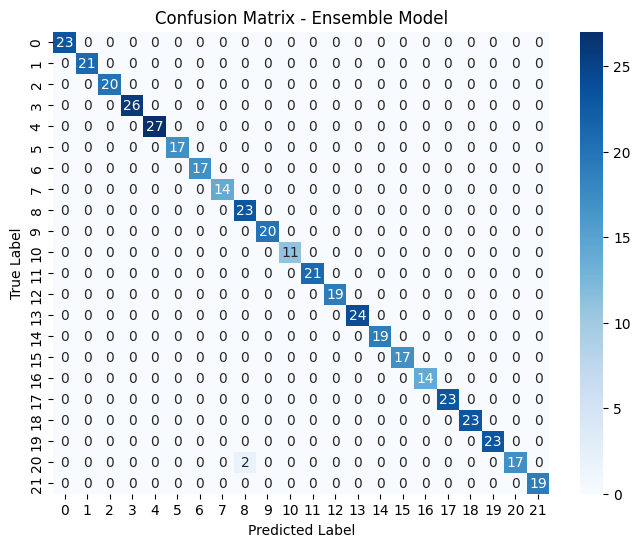

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns

# Calculate the confusion matrix for the ensemble model
conf_matrix_voting = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_voting, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Ensemble Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Save the classification matrix plot as PNG
plt.savefig('confusion_matrix on Crop_recommendation dataset.png', dpi=300)  # Specify the filename and DPI
plt.show()

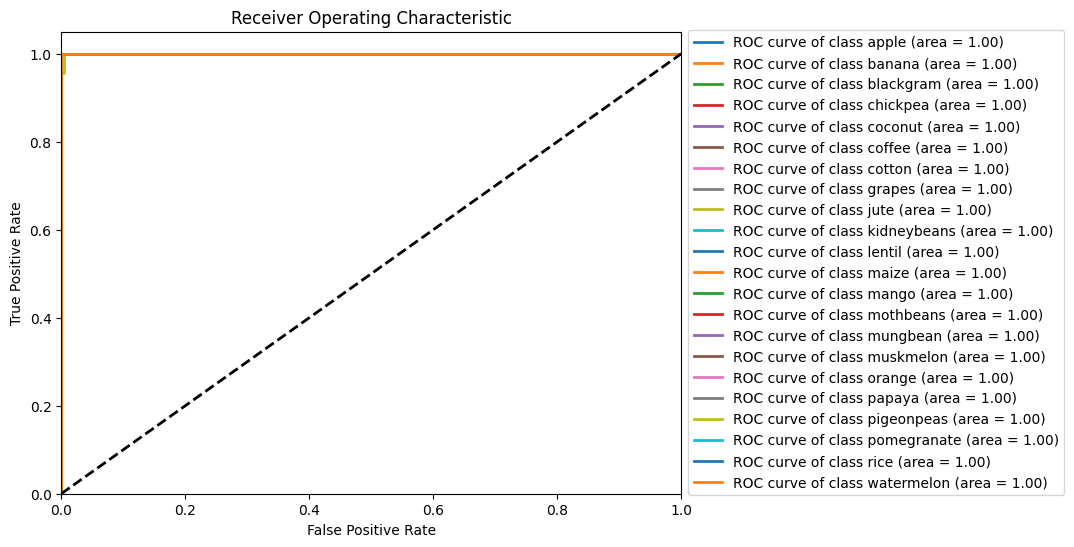

<Figure size 640x480 with 0 Axes>

Class apple - ROC AUC Score: 1.00
Class banana - ROC AUC Score: 1.00
Class blackgram - ROC AUC Score: 1.00
Class chickpea - ROC AUC Score: 1.00
Class coconut - ROC AUC Score: 1.00
Class coffee - ROC AUC Score: 1.00
Class cotton - ROC AUC Score: 1.00
Class grapes - ROC AUC Score: 1.00
Class jute - ROC AUC Score: 1.00
Class kidneybeans - ROC AUC Score: 1.00
Class lentil - ROC AUC Score: 1.00
Class maize - ROC AUC Score: 1.00
Class mango - ROC AUC Score: 1.00
Class mothbeans - ROC AUC Score: 1.00
Class mungbean - ROC AUC Score: 1.00
Class muskmelon - ROC AUC Score: 1.00
Class orange - ROC AUC Score: 1.00
Class papaya - ROC AUC Score: 1.00
Class pigeonpeas - ROC AUC Score: 1.00
Class pomegranate - ROC AUC Score: 1.00
Class rice - ROC AUC Score: 1.00
Class watermelon - ROC AUC Score: 1.00


In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for each class
y_scores = ensemble.predict_proba(X_test)

# Define the list of unique class labels
classes = np.unique(y_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test == classes[i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Position the legend beside the figure
plt.show()

# Save the figure as PNG
plt.savefig('ROC Curve on Crop_recommendation dataset.png', dpi=300)  # Specify the filename and DPI
plt.show()

# Print the ROC AUC scores for each class
for i in range(len(classes)):
    print("Class {0} - ROC AUC Score: {1:.2f}".format(classes[i], roc_auc[i]))



**indiancrop_dataset**

In [ ]:
indiancrop_df = pd.read_csv("indiancrop_dataset.csv")
indiancrop_df.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice


Indian Crop Dataset Test Accuracy: 0.9954545454545455
Confusion Matrix (Indian Crop Dataset Test Set):
 [[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]

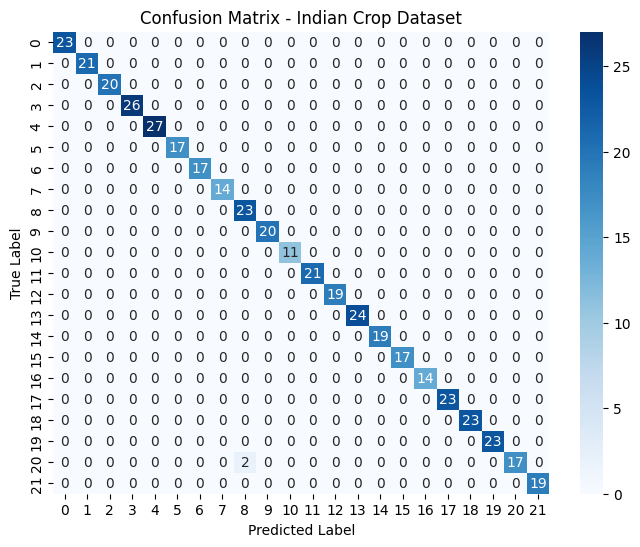

<Figure size 640x480 with 0 Axes>

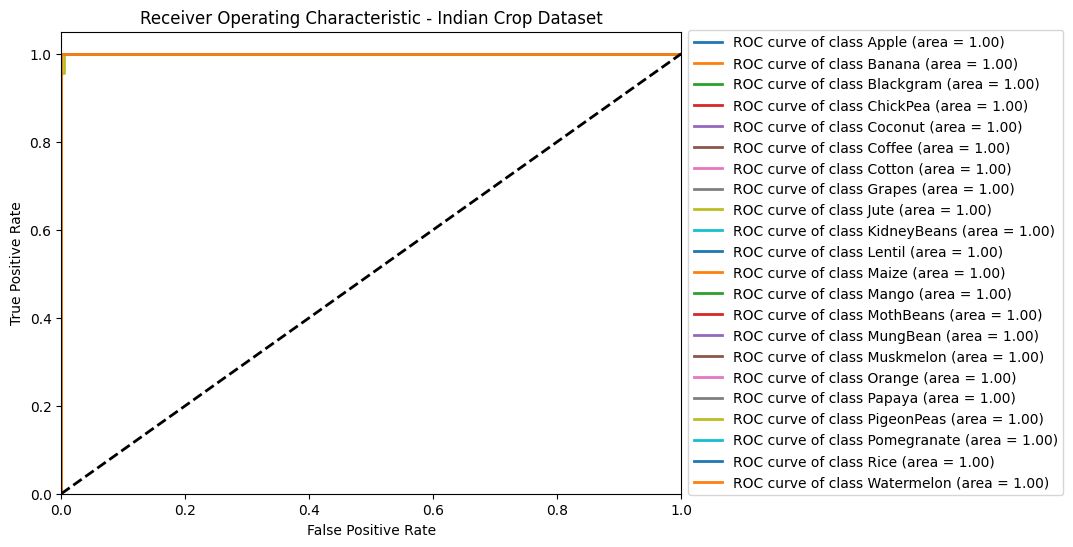

Class Apple - ROC AUC Score: 1.00
Class Banana - ROC AUC Score: 1.00
Class Blackgram - ROC AUC Score: 1.00
Class ChickPea - ROC AUC Score: 1.00
Class Coconut - ROC AUC Score: 1.00
Class Coffee - ROC AUC Score: 1.00
Class Cotton - ROC AUC Score: 1.00
Class Grapes - ROC AUC Score: 1.00
Class Jute - ROC AUC Score: 1.00
Class KidneyBeans - ROC AUC Score: 1.00
Class Lentil - ROC AUC Score: 1.00
Class Maize - ROC AUC Score: 1.00
Class Mango - ROC AUC Score: 1.00
Class MothBeans - ROC AUC Score: 1.00
Class MungBean - ROC AUC Score: 1.00
Class Muskmelon - ROC AUC Score: 1.00
Class Orange - ROC AUC Score: 1.00
Class Papaya - ROC AUC Score: 1.00
Class PigeonPeas - ROC AUC Score: 1.00
Class Pomegranate - ROC AUC Score: 1.00
Class Rice - ROC AUC Score: 1.00
Class Watermelon - ROC AUC Score: 1.00


<Figure size 640x480 with 0 Axes>

In [ ]:
# Load and preprocess the "indiancrop_df" dataset
indiancrop_X = indiancrop_df[['N_SOIL', 'P_SOIL', 'K_SOIL', 'TEMPERATURE', 'HUMIDITY', 'ph', 'RAINFALL']].values
indiancrop_y = indiancrop_df['CROP']

# Split the data into training and testing sets
indiancrop_X_train, indiancrop_X_test, indiancrop_y_train, indiancrop_y_test = train_test_split(indiancrop_X, indiancrop_y, test_size=0.2, random_state=42)

# Fit the ensemble on the "indiancrop_df" training data
ensemble.fit(indiancrop_X_train, indiancrop_y_train)

# Make predictions on the "indiancrop_df" testing set
indiancrop_y_pred = ensemble.predict(indiancrop_X_test)

# Evaluate the ensemble on the "indiancrop_df"
indiancrop_accuracy_test = accuracy_score(indiancrop_y_test, indiancrop_y_pred)
indiancrop_confusion_matrix_test = confusion_matrix(indiancrop_y_test, indiancrop_y_pred)
indiancrop_classification_report_test = classification_report(indiancrop_y_test, indiancrop_y_pred)

# Print the results for "indiancrop_df"
print("Indian Crop Dataset Test Accuracy:", indiancrop_accuracy_test)
print("Confusion Matrix (Indian Crop Dataset Test Set):\n", indiancrop_confusion_matrix_test)
print("Classification Report (Indian Crop Dataset Test Set):\n", indiancrop_classification_report_test)

from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score for the ensemble model
precision = precision_score(indiancrop_y_test, indiancrop_y_pred, average='weighted')
recall = recall_score(indiancrop_y_test, indiancrop_y_pred, average='weighted')
f1 = f1_score(indiancrop_y_test, indiancrop_y_pred, average='weighted')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate the confusion matrix for the ensemble model
indiancrop_conf_matrix = confusion_matrix(indiancrop_y_test, indiancrop_y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(indiancrop_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Indian Crop Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Save the classification matrix plot as PNG
plt.savefig('indiancrop_confusion_matrix.png', dpi=300)

# Compute ROC curve and AUC for each class
indiancrop_y_scores = ensemble.predict_proba(indiancrop_X_test)
indiancrop_classes = np.unique(indiancrop_y_test)
indiancrop_fpr = dict()
indiancrop_tpr = dict()
indiancrop_roc_auc = dict()

for i in range(len(indiancrop_classes)):
    indiancrop_fpr[i], indiancrop_tpr[i], _ = roc_curve(indiancrop_y_test == indiancrop_classes[i], indiancrop_y_scores[:, i])
    indiancrop_roc_auc[i] = auc(indiancrop_fpr[i], indiancrop_tpr[i])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(indiancrop_classes)):
    plt.plot(indiancrop_fpr[i], indiancrop_tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(indiancrop_classes[i], indiancrop_roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Indian Crop Dataset')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Save the ROC curve plot as PNG
plt.savefig('indiancrop_roc_curve.png', dpi=300)

# Print the ROC AUC scores for each class
for i in range(len(indiancrop_classes)):
    print("Class {0} - ROC AUC Score: {1:.2f}".format(indiancrop_classes[i], indiancrop_roc_auc[i]))





**crop_recommendation_with_water dataset**

In [ ]:
water_df = pd.read_csv("crop_recommendation_with_water.csv")
water_df.head()

,N,P,K,temperature(in degree celsius),humidity(in percentage),ph of soil,rainfall( in mm ),label,water-availability(liters per year)
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,3000.0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,3020.0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,3040.0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,3060.0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,3080.0


Test Accuracy (Crop Recommendation with Water Dataset): 1.0
Confusion Matrix (Crop Recommendation with Water Dataset):
 [[25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0

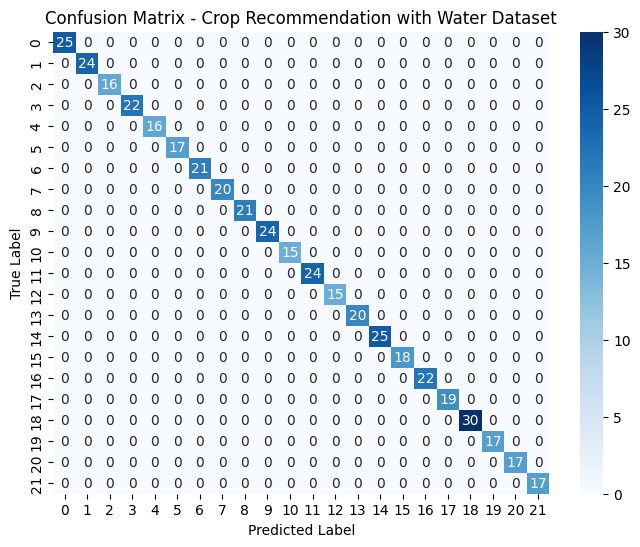

<Figure size 640x480 with 0 Axes>

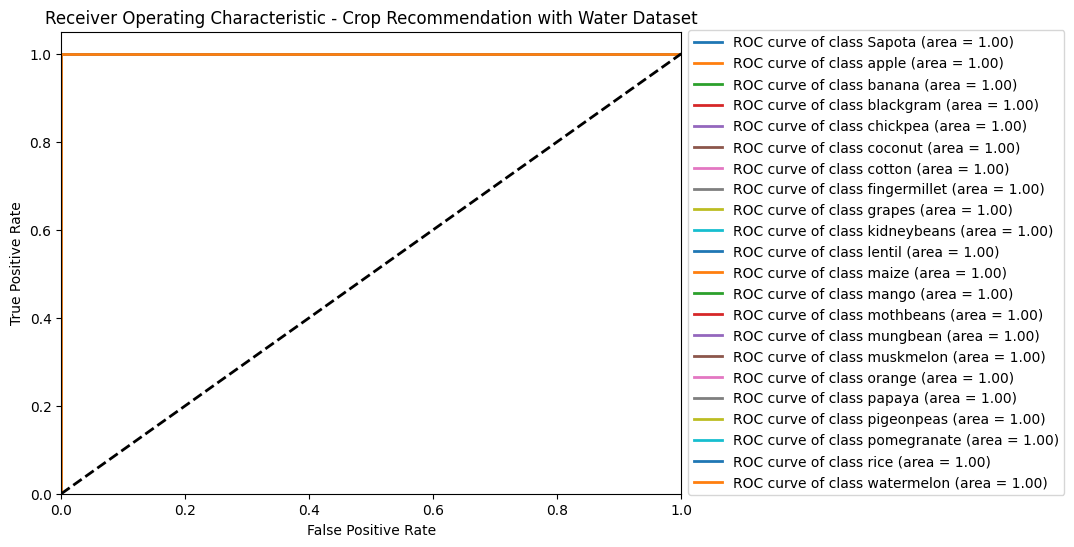

Class Sapota - ROC AUC Score: 1.00
Class apple - ROC AUC Score: 1.00
Class banana - ROC AUC Score: 1.00
Class blackgram - ROC AUC Score: 1.00
Class chickpea - ROC AUC Score: 1.00
Class coconut - ROC AUC Score: 1.00
Class cotton - ROC AUC Score: 1.00
Class fingermillet - ROC AUC Score: 1.00
Class grapes - ROC AUC Score: 1.00
Class kidneybeans - ROC AUC Score: 1.00
Class lentil - ROC AUC Score: 1.00
Class maize - ROC AUC Score: 1.00
Class mango - ROC AUC Score: 1.00
Class mothbeans - ROC AUC Score: 1.00
Class mungbean - ROC AUC Score: 1.00
Class muskmelon - ROC AUC Score: 1.00
Class orange - ROC AUC Score: 1.00
Class papaya - ROC AUC Score: 1.00
Class pigeonpeas - ROC AUC Score: 1.00
Class pomegranate - ROC AUC Score: 1.00
Class rice - ROC AUC Score: 1.00
Class watermelon - ROC AUC Score: 1.00


<Figure size 640x480 with 0 Axes>

In [ ]:
# Load the "crop_recommendation_with_water" dataset
water_X = water_df[['N', 'P', 'K', 'temperature(in degree celsius)', 'humidity(in percentage)', 'ph of soil', 'rainfall( in mm )']].values
water_y = water_df['label']

# Split the data into testing sets
water_X_train, water_X_test, water_y_train, water_y_test = train_test_split(water_X, water_y, test_size=0.2, random_state=42)

# Fit the ensemble on the training data
ensemble.fit(water_X_train, water_y_train)

# Make predictions on the testing set
water_y_pred = ensemble.predict(water_X_test)

# Evaluate the ensemble on the testing set
water_accuracy_test = accuracy_score(water_y_test, water_y_pred)
water_confusion_matrix_test = confusion_matrix(water_y_test, water_y_pred)
water_classification_report_test = classification_report(water_y_test, water_y_pred)

# Print the results
print("Test Accuracy (Crop Recommendation with Water Dataset):", water_accuracy_test)
print("Confusion Matrix (Crop Recommendation with Water Dataset):\n", water_confusion_matrix_test)
print("Classification Report (Crop Recommendation with Water Dataset):\n", water_classification_report_test)

# Calculate precision, recall, and F1-score
water_precision = precision_score(water_y_test, water_y_pred, average='weighted')  # Handle zero division warnings
water_recall = recall_score(water_y_test, water_y_pred, average='weighted')
water_f1 = f1_score(water_y_test, water_y_pred, average='weighted')

# Print the results
print("Precision:", water_precision)
print("Recall:", water_recall)
print("F1-score:", water_f1)

# Calculate the confusion matrix for the ensemble model
water_conf_matrix_voting = confusion_matrix(water_y_test, water_y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(water_conf_matrix_voting, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Crop Recommendation with Water Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Save the classification matrix plot as PNG
plt.savefig('water_confusion_matrix.png', dpi=300)

# Compute ROC curve and AUC for each class
water_y_scores = ensemble.predict_proba(water_X_test)
water_classes = np.unique(water_y_test)
water_fpr = dict()
water_tpr = dict()
water_roc_auc = dict()

for i in range(len(water_classes)):
    water_fpr[i], water_tpr[i], _ = roc_curve(water_y_test == water_classes[i], water_y_scores[:, i])
    water_roc_auc[i] = auc(water_fpr[i], water_tpr[i])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(water_classes)):
    plt.plot(water_fpr[i], water_tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(water_classes[i], water_roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Crop Recommendation with Water Dataset')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Save the ROC curve plot as PNG
plt.savefig('water_roc_curve.png', dpi=300)

# Print the ROC AUC scores for each class
for i in range(len(water_classes)):
    print("Class {0} - ROC AUC Score: {1:.2f}".format(water_classes[i], water_roc_auc[i]))


**Crop_and_fertilizer_dataset**

In [ ]:
caf_df = pd.read_csv("Crop_and_fertilizer_dataset.csv")
caf_df.head()

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer,Link
0,Kolhapur,Black,75,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
1,Kolhapur,Black,80,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
2,Kolhapur,Black,85,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
3,Kolhapur,Black,90,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
4,Kolhapur,Black,95,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo


Test Accuracy (Crop Recommendation with Crop and Fertilizer Dataset): 0.7995570321151716
Confusion Matrix (Crop Recommendation with Crop and Fertilizer Dataset):
 [[128   0   0   0   0   0   0   0   0   3   0   1   0   0   0  14]
 [  0  26   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   7   0   3   0   0   1   2   0   0   0   1   0   0   0]
 [  0   0   0  19   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   1   0  30   5   0   0   1   0   0   0   4   0   0   0]
 [  0   0   0   0   6  33   0   2   2   0   1   0   4   0   8  10]
 [  7   0   0   0   0   0  64   0   0   0   0   0   0   0   0   1]
 [  0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   6   0   0   6   0   0   0   1   0   0   0]
 [ 12   0   0   0   0   0   0   0   0  41   0   0   2   3   0   6]
 [  0   0   0   0   0   0   0   0   0   0   8   0   0   0   0   0]
 [ 12   0   0   0   0   0   0   0   0   0   0 193   0   0   0   0]
 [  0   0   2   0   4   4   0   0

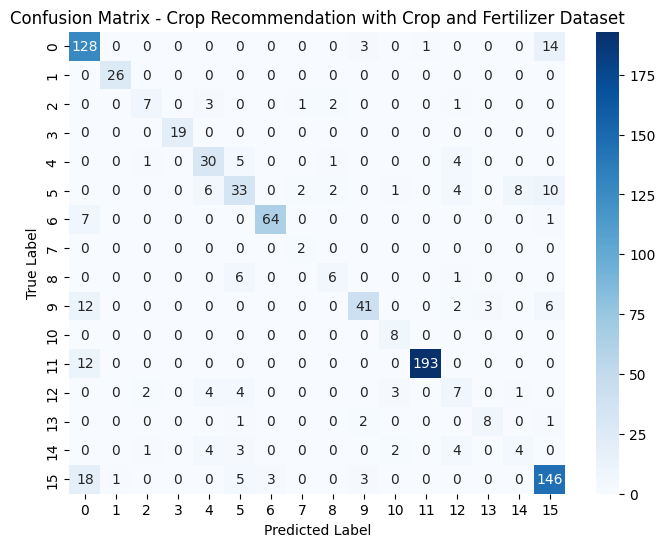

<Figure size 640x480 with 0 Axes>

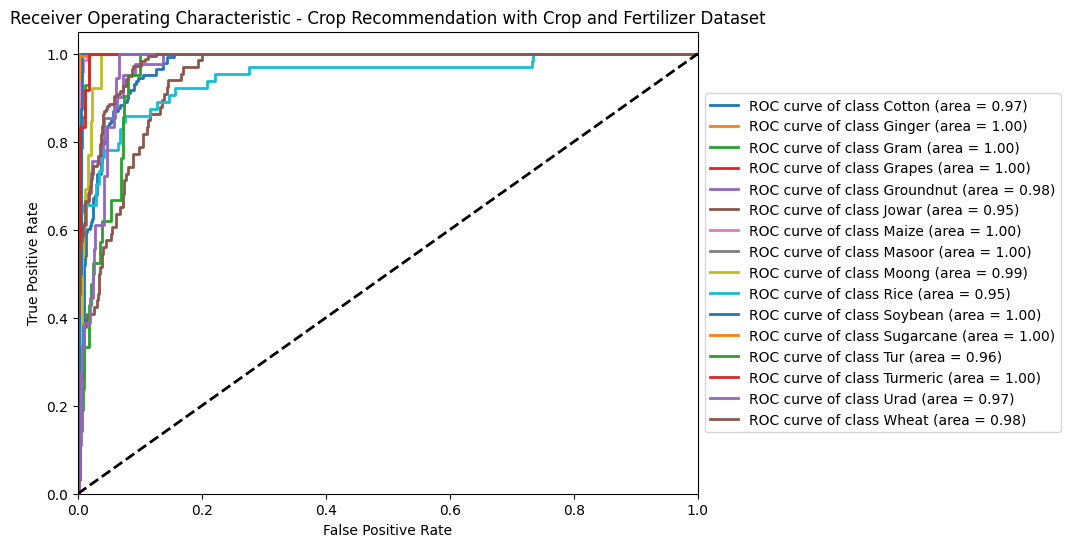

Class Cotton - ROC AUC Score: 0.97
Class Ginger - ROC AUC Score: 1.00
Class Gram - ROC AUC Score: 1.00
Class Grapes - ROC AUC Score: 1.00
Class Groundnut - ROC AUC Score: 0.98
Class Jowar - ROC AUC Score: 0.95
Class Maize - ROC AUC Score: 1.00
Class Masoor - ROC AUC Score: 1.00
Class Moong - ROC AUC Score: 0.99
Class Rice - ROC AUC Score: 0.95
Class Soybean - ROC AUC Score: 1.00
Class Sugarcane - ROC AUC Score: 1.00
Class Tur - ROC AUC Score: 0.96
Class Turmeric - ROC AUC Score: 1.00
Class Urad - ROC AUC Score: 0.97
Class Wheat - ROC AUC Score: 0.98


<Figure size 640x480 with 0 Axes>

In [ ]:
# Load the "crop_recommendation_with_water" dataset
caf_X = caf_df[['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'pH', 'Rainfall']].values
caf_y = caf_df['Crop']

# Split the data into testing sets
caf_X_train, caf_X_test, caf_y_train, caf_y_test = train_test_split(caf_X, caf_y, test_size=0.2, random_state=42)

# Fit the ensemble on the training data
ensemble.fit(caf_X_train, caf_y_train)

# Make predictions on the testing set
caf_y_pred = ensemble.predict(caf_X_test)

# Evaluate the ensemble on the testing set
caf_accuracy_test = accuracy_score(caf_y_test, caf_y_pred)
caf_confusion_matrix_test = confusion_matrix(caf_y_test, caf_y_pred)
caf_classification_report_test = classification_report(caf_y_test, caf_y_pred)

# Print the results
print("Test Accuracy (Crop Recommendation with Crop and Fertilizer Dataset):", caf_accuracy_test)
print("Confusion Matrix (Crop Recommendation with Crop and Fertilizer Dataset):\n", caf_confusion_matrix_test)
print("Classification Report (Crop Recommendation with Crop and Fertilizer Dataset):\n", caf_classification_report_test)

# Calculate precision, recall, and F1-score
caf_precision = precision_score(caf_y_test, caf_y_pred, average='weighted')  # Handle zero division warnings
caf_recall = recall_score(caf_y_test, caf_y_pred, average='weighted')
caf_f1 = f1_score(caf_y_test, caf_y_pred, average='weighted')

# Print the results
print("Precision:", caf_precision)
print("Recall:", caf_recall)
print("F1-score:", caf_f1)

# Calculate the confusion matrix for the ensemble model
caf_conf_matrix_voting = confusion_matrix(caf_y_test, caf_y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(caf_conf_matrix_voting, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Crop Recommendation with Crop and Fertilizer Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Save the classification matrix plot as PNG
plt.savefig('Crop and Fertilizer_confusion_matrix.png', dpi=300)

# Compute ROC curve and AUC for each class
caf_y_scores = ensemble.predict_proba(caf_X_test)
caf_classes = np.unique(caf_y_test)
caf_fpr = dict()
caf_tpr = dict()
caf_roc_auc = dict()

for i in range(len(caf_classes)):
    caf_fpr[i], caf_tpr[i], _ = roc_curve(caf_y_test == caf_classes[i], caf_y_scores[:, i])
    caf_roc_auc[i] = auc(caf_fpr[i], caf_tpr[i])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(caf_classes)):
    plt.plot(caf_fpr[i], caf_tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(caf_classes[i], caf_roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Crop Recommendation with Crop and Fertilizer Dataset')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Save the ROC curve plot as PNG
plt.savefig('Crop and Fertilizer_roc_curve.png', dpi=300)

# Print the ROC AUC scores for each class
for i in range(len(caf_classes)):
    print("Class {0} - ROC AUC Score: {1:.2f}".format(caf_classes[i], caf_roc_auc[i]))


**Cross Validation**

In [102]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation using the ensemble with 5 folds
cv_scores = cross_val_score(ensemble, X, y, cv=5, scoring='accuracy')

# Calculate the mean cross-validation score
mean_cv_score = np.mean(cv_scores)

# Print the cross-validation scores for each fold
for fold, score in enumerate(cv_scores, start=1):
    print(f"Fold {fold} - Cross-validation Score: {score}")

# Print the mean cross-validation score
print("Mean Cross-validation Score:", mean_cv_score)


Fold 1 - Cross-validation Score: 0.9977272727272727
Fold 2 - Cross-validation Score: 0.9954545454545455
Fold 3 - Cross-validation Score: 0.9954545454545455
Fold 4 - Cross-validation Score: 0.9954545454545455
Fold 5 - Cross-validation Score: 0.990909090909091
Mean Cross-validation Score: 0.9950000000000001


**Overall Accuracy**

In [ ]:
print("Accuracy of Crop_recommendation dataset:", accuracy_test)
print("Indian Crop Dataset Test Accuracy:", indiancrop_accuracy_test)
print("Test Accuracy (Crop Recommendation with Water Dataset):", water_accuracy_test)
print("Test Accuracy (Crop Recommendation with Crop and Fertilizer Dataset):", caf_accuracy_test)

Accuracy of Crop_recommendation dataset: 0.9954545454545455
Indian Crop Dataset Test Accuracy: 0.9954545454545455
Test Accuracy (Crop Recommendation with Water Dataset): 1.0
Test Accuracy (Crop Recommendation with Crop and Fertilizer Dataset): 0.7995570321151716
